Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
k = 2, Silhouette Score = 0.5818
k = 3, Silhouette Score = 0.4799
k = 4, Silhouette Score = 0.3850
k = 5, Silhouette Score = 0.3450
k = 6, Silhouette Score = 0.3339
k = 7, Silhouette Score = 0.2664
k = 8, Silhouette Score = 0.3416
k = 9, Silhouette Score = 0.3244
k = 10, Silhouette Score = 0.3354


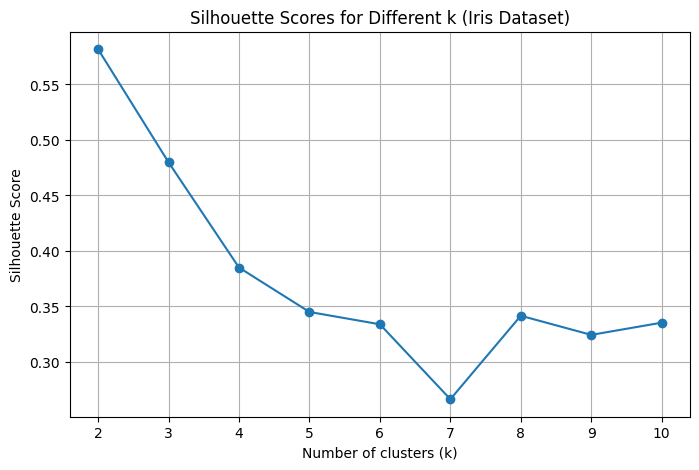


Best number of clusters (k): 2


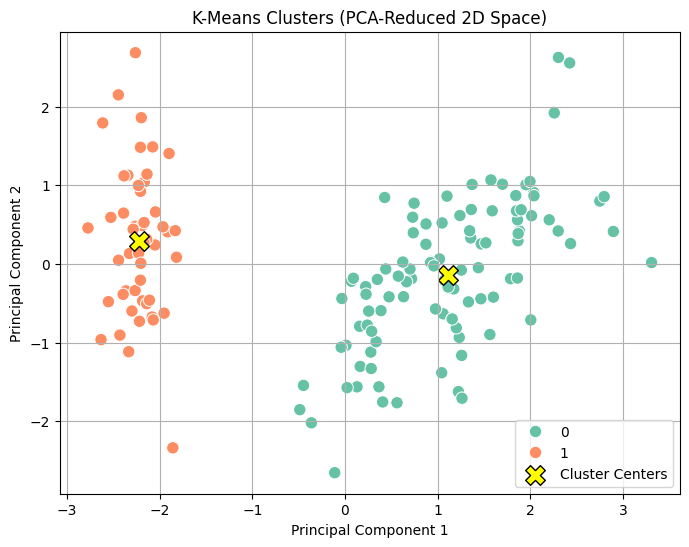


Cluster Sizes:
 0    100
1     50
Name: count, dtype: int64

Comparison between true species and cluster labels:

Cluster Label   0   1
True Label           
0               0  50
1              50   0
2              50   0

Mapping analysis:
Cluster 0 ‚Üí likely species: versicolor
Cluster 1 ‚Üí likely species: setosa

Final dataset with cluster labels (first 5 rows):

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster Label  
0              1  
1              1  
2              1  
3              1  
4              1  


In [1]:
# ---------------------------------------------------------------
# Ex 10 - K-Means with Dimensionality Reduction (PCA)
# Course: AI23331 - Foundations of Machine Learning
# ---------------------------------------------------------------

# 1Ô∏è‚É£ Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2Ô∏è‚É£ Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

print("Dataset shape:", X.shape)
print("Feature names:", feature_names)

# 3Ô∏è‚É£ Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4Ô∏è‚É£ Find the best number of clusters (k) using silhouette score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k (Iris Dataset)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Choose best k
best_k = k_values[np.argmax(silhouette_scores)]
print("\nBest number of clusters (k):", best_k)

# 5Ô∏è‚É£ Fit final K-Means model with chosen k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)
labels = kmeans_final.labels_

# 6Ô∏è‚É£ Apply PCA to reduce dimensions from 4D ‚Üí 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans_final.cluster_centers_)

# 7Ô∏è‚É£ Plot clusters and centroids in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=80)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            s=200, c='yellow', edgecolor='black', marker='X', label='Cluster Centers')
plt.title("K-Means Clusters (PCA-Reduced 2D Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 8Ô∏è‚É£ Analyze cluster sizes
cluster_sizes = pd.Series(labels).value_counts().sort_index()
print("\nCluster Sizes:\n", cluster_sizes)

# 9Ô∏è‚É£ Compare clusters with true species labels
comparison_df = pd.DataFrame({'True Label': y_true, 'Cluster Label': labels})
print("\nComparison between true species and cluster labels:\n")
print(pd.crosstab(comparison_df['True Label'], comparison_df['Cluster Label']))

# üîü Analyze mapping of clusters to actual species
species_names = iris.target_names
print("\nMapping analysis:")
for i in range(best_k):
    indices = np.where(labels == i)
    true_species = y_true[indices]
    most_common_species = np.bincount(true_species).argmax()
    print(f"Cluster {i} ‚Üí likely species: {species_names[most_common_species]}")

# 1Ô∏è‚É£1Ô∏è‚É£ Add cluster labels to original dataset
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Cluster Label'] = labels
print("\nFinal dataset with cluster labels (first 5 rows):\n")
print(iris_df.head())
